In [2]:
import matplotlib.pyplot as plt
import torch
import time

from diffusion.unet_model import Unet
from diffusion.ddim import DDIM
from diffusion.ddpm import DDPM

In [3]:
# set device to cpu or cuda or mps
if torch.backends.mps.is_available():
    device = torch.device('mps') 
    print("Device set to : mps")
elif(torch.cuda.is_available()): 
    device = torch.device('cuda:0') 
    torch.cuda.empty_cache()
    print("Device set to : " + str(torch.cuda.get_device_name(device)))
else:
    device = torch.device('cpu')
    print("Device set to : cpu")

Device set to : mps


In [4]:
beta_start = 1e-4
beta_end = 0.02
time_step = 500

In [5]:
unet = Unet(
    image_channels = 3, 
    down_channels  = [64, 128, 256, 512], 
    up_channels = [512, 256, 128, 64], 
    out_dim = 64, 
    time_emb_dim = 32, 
    context_dim = 18
   ).to(device)
unet.load_state_dict(torch.load('./weights/' + f"model_499.pth"))

<All keys matched successfully>

In [6]:
ddpm = DDPM(beta_start, beta_end, time_step, device)

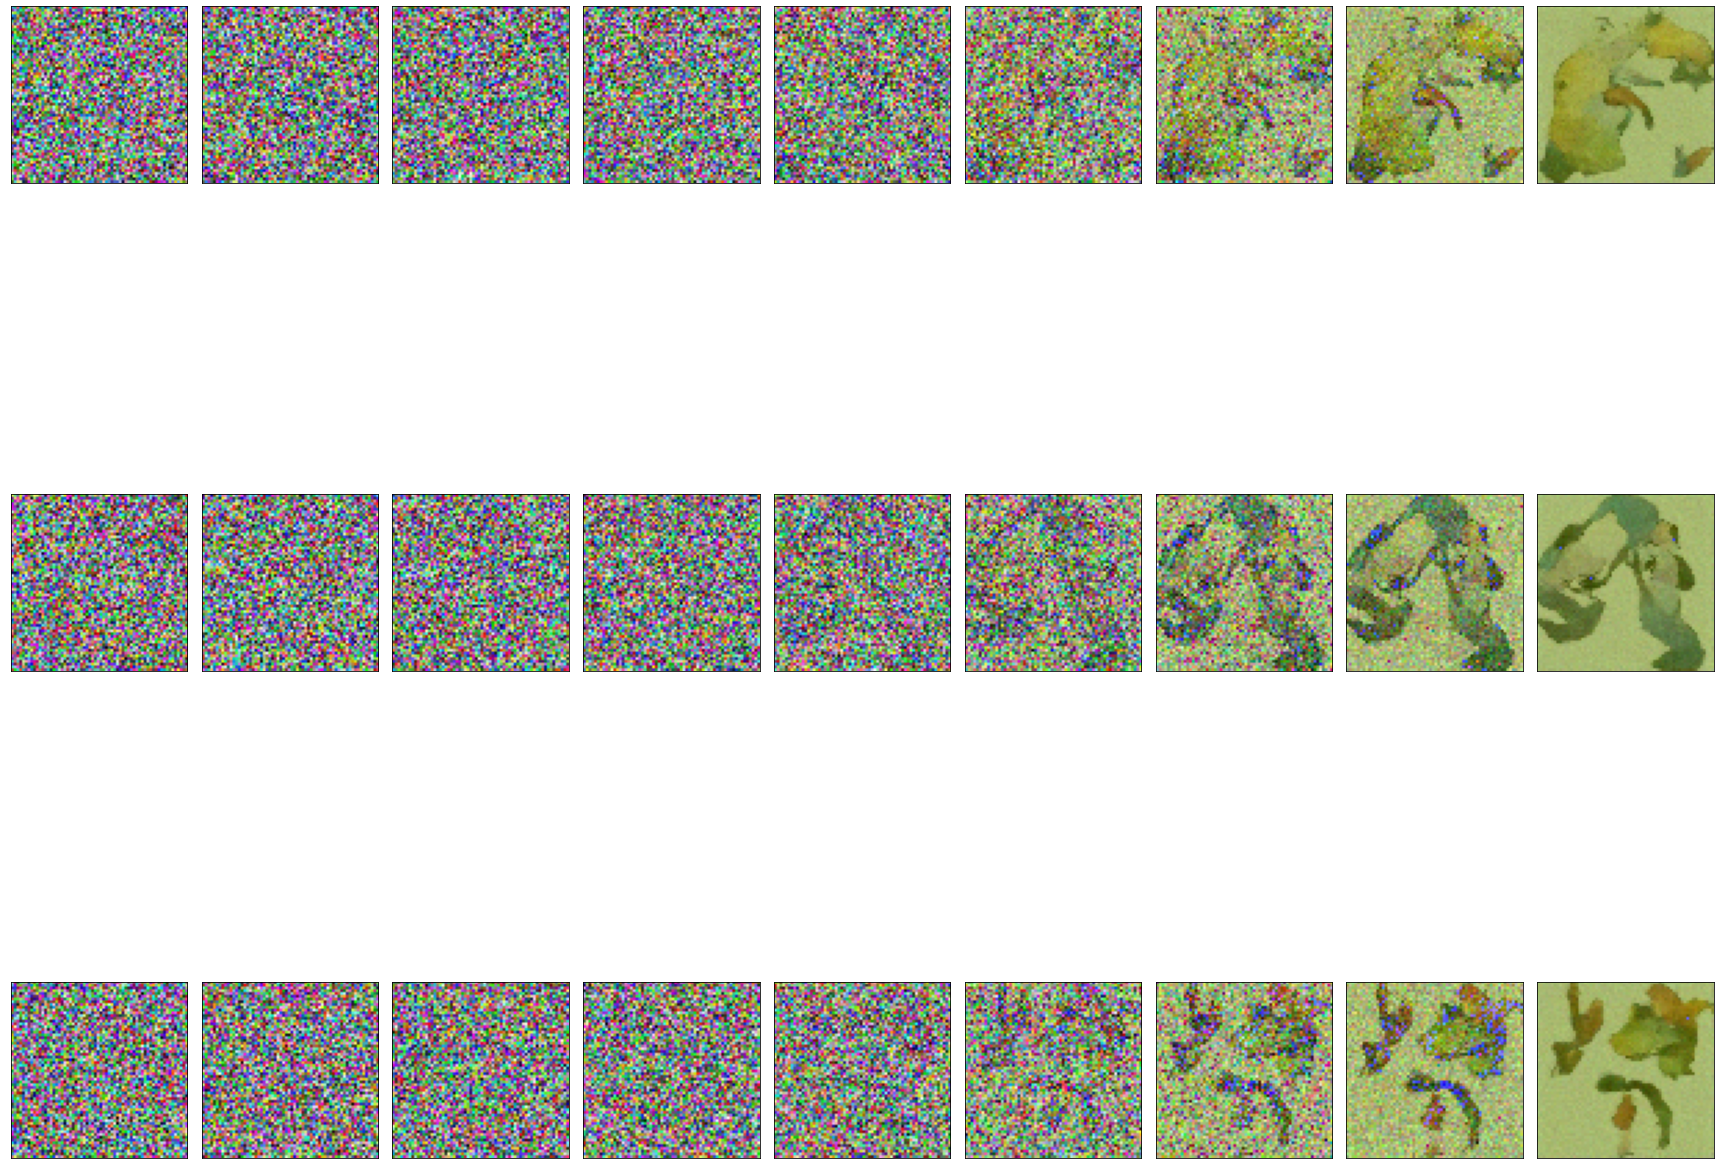

20.43487787246704

In [7]:
start = time.time()
ddpm_res = ddpm.sample(unet, 3, 64, 18, 350, 40, plot=True)
time.time()-start

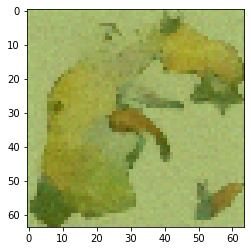

In [8]:
plt.imshow(ddpm_res[0][-1])

In [9]:
ddim = DDIM(beta_start, beta_end, time_step, device)

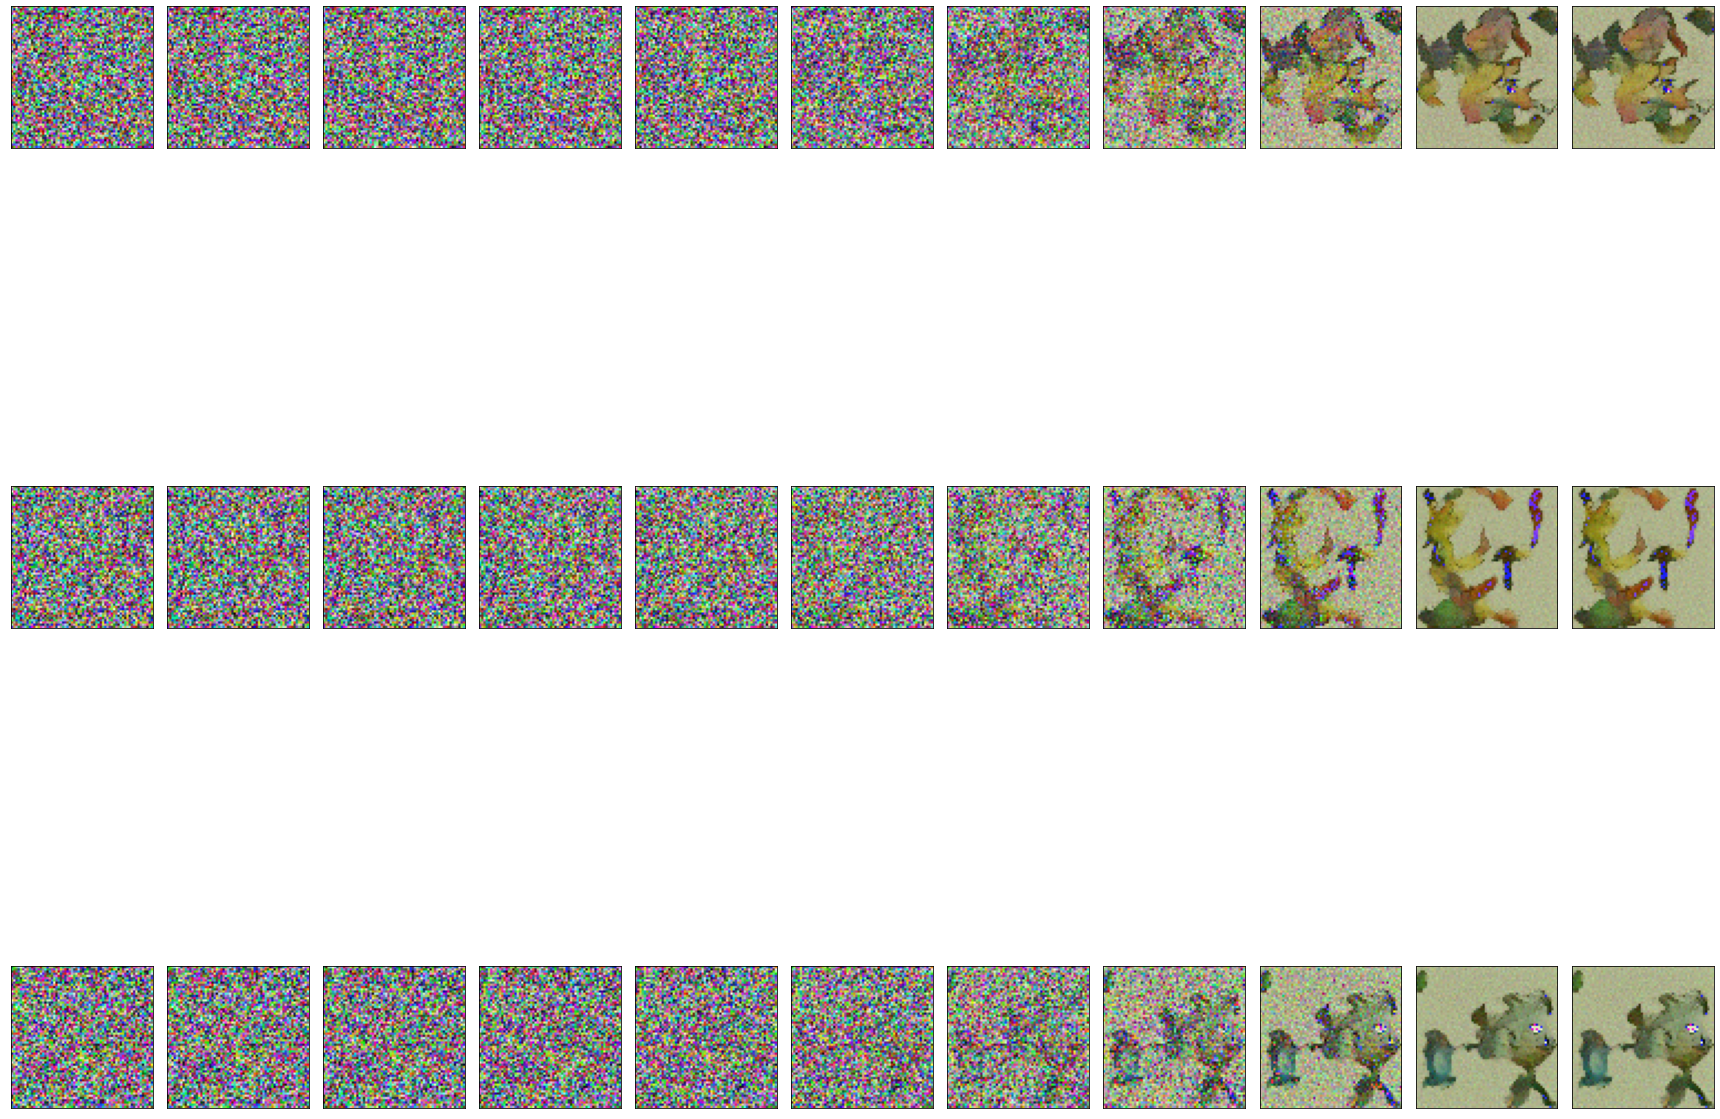

1.993070125579834

In [10]:
start = time.time()
ddim_res = ddim.sample(unet, 3, 64, 18, 400, 40, plot=True)
time.time()-start

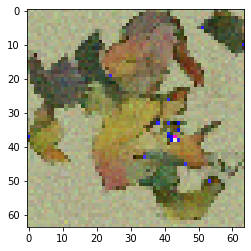

In [11]:
plt.imshow(ddim_res[0][-1])